In [652]:
from prophet import Prophet 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [653]:

incoming_data = pd.read_csv("/Users/ahmadzarzar/Downloads/csv_hämtade_filer/incoming_packages.csv")


In [654]:
incoming_data.tail()

,date,total_packages,cooled_packages,fire_packages,normal_packages
846,2022-04-26,2268,467,503,1298
847,2022-04-27,2466,432,641,1393
848,2022-04-28,2436,545,556,1335
849,2022-04-29,2302,368,547,1387
850,2022-04-30,1270,227,331,712


In [655]:
incoming_data.shape

(851, 5)

In [656]:
incoming_data = incoming_data[['date','total_packages']]
incoming_data.head()

,date,total_packages
0,2020-01-01,1745
1,2020-01-02,1847
2,2020-01-03,1842
3,2020-01-04,664
4,2020-01-05,871


### Finns det någon trend?

Det verkar som att det definitivt finns en trend här. I det här fallet verkar det att trend som en ökning

### Finns det någon säsongsvariation? I så fall, vilka?

Ja det finns säsongsvariation det är ganska synlig när vi plotar datan så ser vi norlmalt ökning av trenden och i vissa tider så har vi säsongsvariation så antigen blir det extra försäljning eller så minskar det och det kan beror på att det kan finnas högtider dvs jul blackweek osv eller det kan finnas semesterledigt eller nypersonal osv så svaret är ja det finns säsongsvariation

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<function matplotlib.pyplot.show(close=None, block=None)>

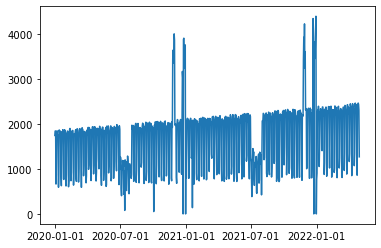

In [717]:
plt.plot(incoming_data['date'],incoming_data['total_packages'])
plt.xticks(['2020-01-01','2020-07-01','2021-01-01','2021-07-01','2022-01-01'])
plt.show


### Finns det några dagar med extrema värden?

Ja det kan man säga att det är båda extremt värdenoch säsongsvariation finns några dagar med extrema värden som toppar högst upp och längst ner som ni ser på visualiseringen nedan att det finns några dagar där värde sticker ut från de övriga annars vanligtvis de övriga dagar värde ser ganska ihopslagna ut, men som jag sa i början man kan se det på olika sätt men på detta läget jag ser det är som säsongsvariation eftersom det saker som sker varjer år regelbunden.

<AxesSubplot:>

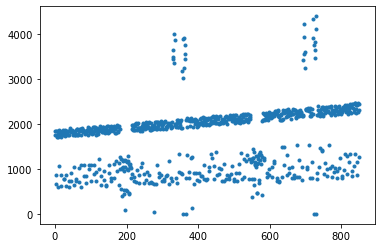

In [658]:
incoming_data['total_packages'].plot(style='.')

### Det finns spikar i november och december, vad kan det bero på?

Det kan beror på många saker men de kännda anledningar är att Fler konsumenter planerade att handla julklappar under Black Week, och Julhandeln i december växer normalt i takt med att ekonomin och befolkningen växer så det kan leda till att många som kommer att köpa, skicka, sälja, paket därför fanns spikar i antal paketen i dessa perioder.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<function matplotlib.pyplot.show(close=None, block=None)>

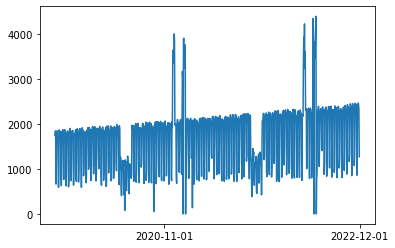

In [659]:
plt.plot(incoming_data['date'],incoming_data['total_packages'])
plt.xticks(['2020-11-01','2022-12-01'])

plt.show


### Träna en facebook prophet modell

In [660]:
model_pro= Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=False)
# model_pro.add_country_holidays(country_name='SE') 

In [661]:
incoming_data['ds']= incoming_data['date']
incoming_data['y']=incoming_data['total_packages']

###  Träna modellen på all data före 2022-04-01
### Testa modellen på all data från 2022-04-01 och framåt

In [662]:
# trien_data= incoming_data[incoming_data['ds'] < '2022-04-01']
# test_data=incoming_data[incoming_data['ds'] > '2022-04-01']

trien_data=incoming_data[:821]
test_data=incoming_data[821:]


In [663]:
incoming_data[['ds','y']].head()

,ds,y
0,2020-01-01,1745
1,2020-01-02,1847
2,2020-01-03,1842
3,2020-01-04,664
4,2020-01-05,871


### Hur modellen har prognostiserat träningsdatan

In [664]:
model_pro.fit(trien_data)

Initial log joint probability = -13.5898


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1567.44   3.87671e-06       93.0469       1.253      0.2714      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       1567.44   4.95923e-07        94.177   5.141e-09       0.001      186  LS failed, Hessian reset 
     134       1567.44   3.51321e-08       88.8264      0.3557           1      211   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [666]:
forecast=model_pro.predict(trien_data)


/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


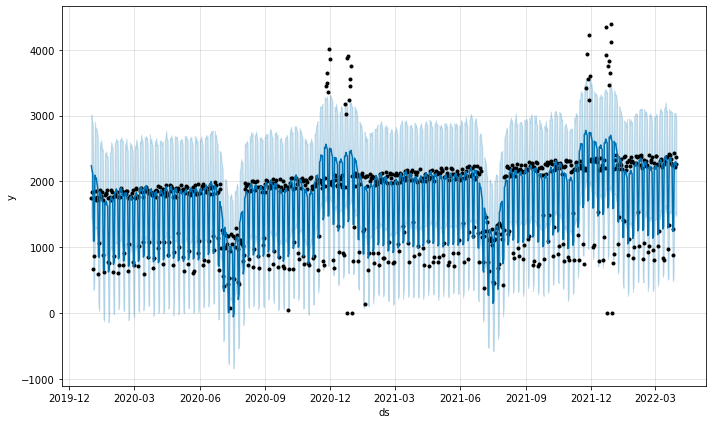

In [685]:
model_pro.plot(forecast)
plt.show()

## Vad ser vi i grafen?

### modellen plottar de observerade värdena för tidsserier är (svarta punkter), de prognostiserade värdena är (blå linjer) och de osäkera intervallen för våra prognoser är (blå skuggad)

## Rita ut modellens komponenter (trend och säsongsvariation)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


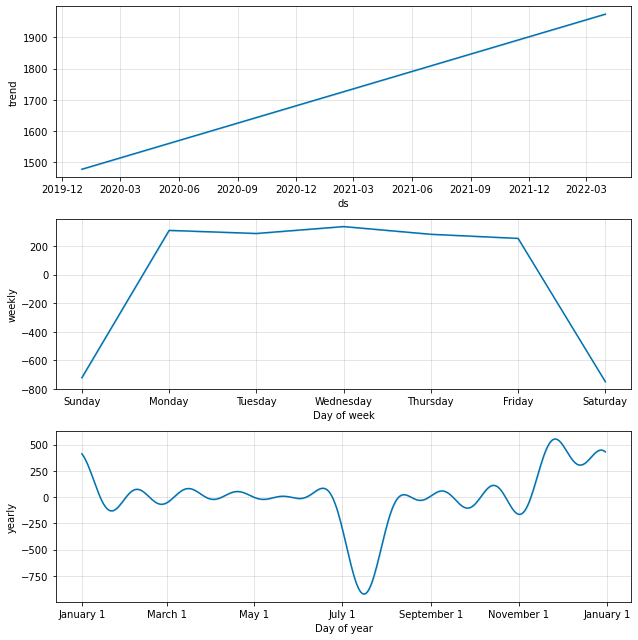

In [669]:
fig = model_pro.plot_components(forecast)

### Kör modellen mot testdatan och se om den presterar bättre än planeringen på 2000 paket om dagen.

In [677]:
forecast_2=model_pro.predict(test_data)

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


### Jämföra modellen med ursprungliga planeringen 

In [711]:
trien_resultat_1 = mean_absolute_error(trien_data.y,forecast.yhat)
print(f'AME för träning {trien_resultat_1}')

AME för träning 205.9212610508908


In [712]:
test_resultat_2 = mean_absolute_error(test_data.y,forecast_2.yhat)
print(f'AME för testing {test_resultat_2}')

AME för testing 117.49290949499085


Med resultatet som vi får av träningsdata och testdatan så ser att modellen har presterat bättre med testdata jämfört med ursprungliga planeringen eftersom vi får 205.92  i mean_absolute_error och vi får i testdata 117.49 så modellen gör mindre fel och presterar bättre jämfört med ursprungliga planeringen.

### Gör en prognostisering för Juni 2022 och rita ut.

/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ahmadzarzar/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


<AxesSubplot:xlabel='ds'>

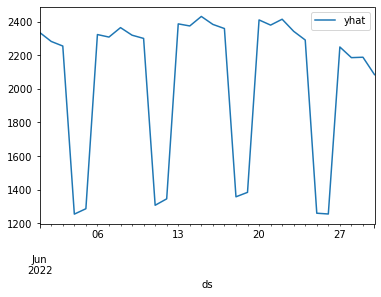

In [710]:
futres=model_pro.make_future_dataframe(periods=92)
june=model_pro.predict(futres)
june=june[(june['ds'] > '2022-05-31') & (june['ds'] < '2022-07-01')]
june = june [['ds','yhat']]
june.plot(x='ds', y='yhat')

